<a href="https://colab.research.google.com/github/Manchal09/mainflow-tasks/blob/main/Mainflowtask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
uploaded = files.upload()

Saving House Price India.csv to House Price India (2).csv


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('House Price India.csv')

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Drop rows with any missing values
data = data.dropna()

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

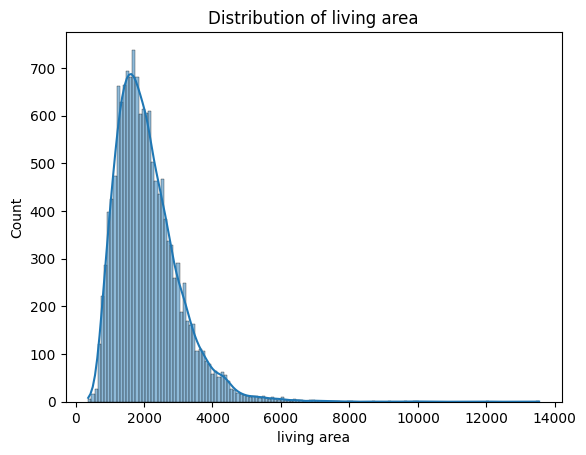

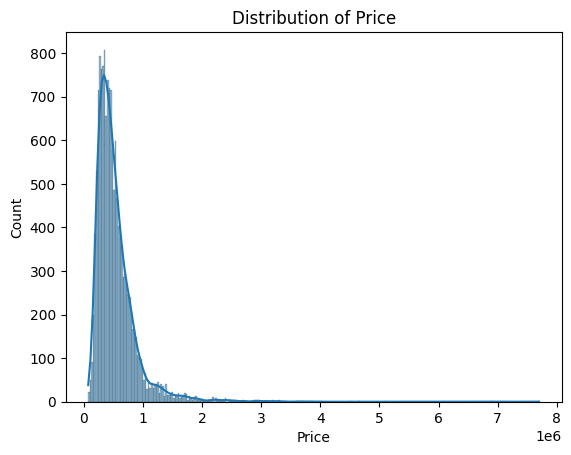

In [36]:
#Analyze distributions of numerical variables
sns.histplot(data['living area'], kde=True)
plt.title('Distribution of living area')
plt.show()

sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

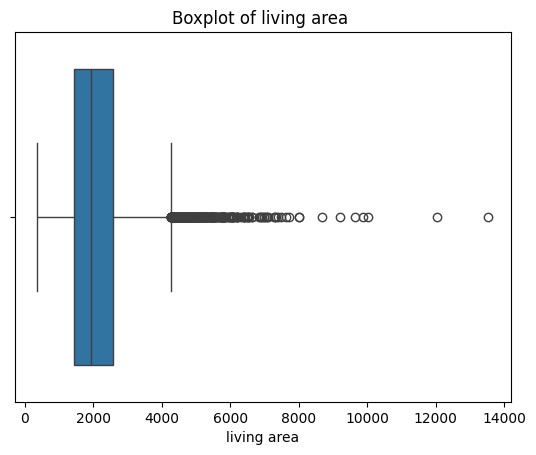

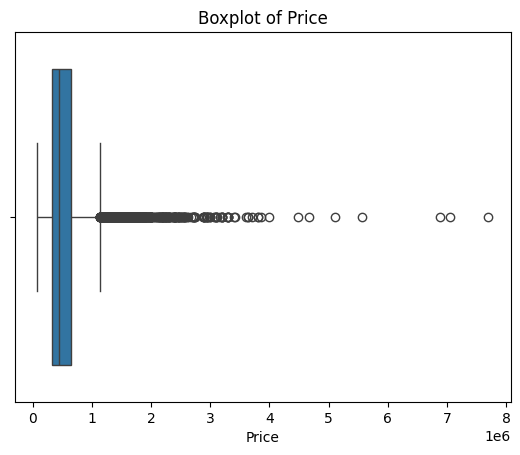

In [37]:
#Identify potential outliers
sns.boxplot(x=data['living area'])
plt.title('Boxplot of living area ')
plt.show()

sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

In [38]:
#Normalize numerical data
numerical_features = ['living area', 'number of bedrooms']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Encode categorical features
categorical_features = ['condition of the house']  # Adjust this based on your actual categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [39]:
#Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X = data.drop('Price', axis=1)
y = data['Price']
X_preprocessed = preprocessor.fit_transform(X)
# Correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))

Price                                    1.000000
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
waterfront present                       0.263687
number of floors                         0.262732
Renovation Year                          0.133173
lot area                                 0.081992
lot_area_renov                           0.075535
Built Year                               0.050307
condition of the house                   0.041376
Longitude                                0.024414
Number of schools nearby                 0.009890
Distance from the airport                0.003804


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Now np is defined and can be used
print(f'Root Mean Square Error (RMSE): {rmse}')

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² (Coefficient of Determination): {r2}')


Root Mean Square Error (RMSE): 254655.269509323
R² (Coefficient of Determination): 0.5398113161027702
